In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [76]:
product = pd.read_csv('user_waybill.csv')

In [108]:
product

,id,waybill_id,description,product_id,ship_from,destination,quantity,unit,emailAddress,date,personnelName,status,transaction_type,month,year
0,1,WT0000000014-00001-1534516057,Admin: Advert and Promotion,100000001,NG-KN-1002-000R,T-000000000014,10,Sachets,rehobothi@yahoo.com,2018-08-17 14:27:37,Iyasele Rehoboth,Approved,Trans-Shipment,8,2018
1,2,WT0000000051-00007-1534517803,Admin:Cooking Gas,100000007,NG-TEST-1,T-000000000051,50,Bags,nnamdi.iwuji@babbangona.com,2018-08-17 14:56:43,Nnamdi Iwuji,Awaiting Approval,Sales Shipment,8,2018
2,3,WT0000000014-00003-1534520097,Admin: Bank Charge,100000003,NG-TEST-1,T-000000000014,10,Packs,rehoboth.iyasele@babbangona.com,2018-08-17 15:34:57,Iyasele Rehoboth,Awaiting Approval,Shipment to Customers,8,2018
3,4,WT0000000014-00003-1534520151,Admin: Bank Charge,100000003,NG-TEST-2,T-000000000014,10,Single Items,rehobothi@yahoo.com,2018-08-17 15:35:51,Iyasele Rehoboth,Awaiting Approval,Shipment to Customers,8,2018
4,6,WT19-00045-43335.434,Produce:Maize-C-White(100kg),100000045,NG-KD-1002-0038,19,550,Bags,john.yohanna@doreopartners.com,2018-08-23 10:25:10,John Yohanna,Declined,Sales Shipment,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28799,28878,WT0000000274-44063-44061.475-Revert,Urea_Indorama_50kg,P5052144063,REVERT,IK00053159,5,Each,rehoboth.iyasele@babbangona.com,2020-11-05 15:30:04,Iyasele Rehoboth,Reverted,MSB Shipment,11,2020
28800,28879,WT0000000274-38063-44061.475-Revert,DAP_DAP_50kg,P5047138063,REVERT,IK00053159,2,Each,rehoboth.iyasele@babbangona.com,2020-11-05 15:30:35,Iyasele Rehoboth,Reverted,MSB Shipment,11,2020
28801,28880,WT0000000274-83010-44061.483-Revert,Maize Seed_SM15C_12.5kg_Assembly_Bag,P8072183010,REVERT,IK00053159,2,Each,rehoboth.iyasele@babbangona.com,2020-11-05 15:31:05,Iyasele Rehoboth,Reverted,MSB Shipment,11,2020
28802,28881,WT0000000274-02003-44061.484-Revert,Herbicide_Atrazine_1L,P1001002003,REVERT,IK00053159,4,Each,rehoboth.iyasele@babbangona.com,2020-11-05 15:31:32,Iyasele Rehoboth,Reverted,MSB Shipment,11,2020


In [78]:
product = product.dropna(subset=[7,8,11,16,17], axis=1)
product = product.reset_index(drop=True)


In [82]:
product = product.fillna(0)

In [80]:
product['month'] = product['date'].str[5:7]
product['year'] = product['date'].str[0:4]

In [83]:
product[['month']] = product[['month']].astype(int)
product[['year']] = product[['year']].astype(int)
product[['quantity']] = product[['quantity']].astype(int)

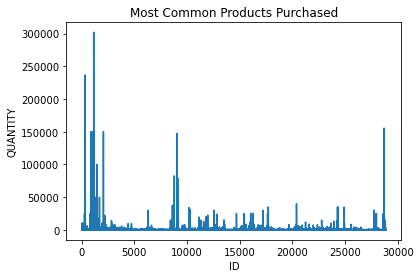

In [84]:
plt.plot(product.id, product.quantity)
plt.xlabel('ID')
plt.ylabel('QUANTITY')
plt.title('Most Common Products Purchased')
plt.show()

In [89]:
df = product[product['product_id'].duplicated(keep=False)]
grp1 = df.groupby('description') 
  
new_product = grp1.aggregate(np.sum)
new_product

,id,quantity,month,year
description,,,,
0,37095,64,0,0
Admin: Advert and Promotion,10251,210,19,4037
Admin: Bank Charge,138,31,33,8072
Admin: Small Wares (Cartons for Nestle loadind),138,120,9,2018
Admin:Other,21002,39,18,14133
...,...,...,...,...
Urea_Indorama_50k,20146,100,5,2020
Urea_Indorama_50kg,58376788,470734,15280,5864060
Urea_Indorama_50kg(off specs),25998,4,7,2020


In [86]:
new_product['quantity'].max()

3823465

In [87]:
mostCommonProduct = new_product[new_product['quantity'] == 3823465]
mostCommonProduct

,id,quantity,month,year
description,,,,
HarvestService:Bags(100kg),2614169,3823465,3562,936731


In [104]:
new_product

,id,quantity,month,year
description,,,,
0,37095,64,0,0
Admin: Advert and Promotion,10251,210,19,4037
Admin: Bank Charge,138,31,33,8072
Admin: Small Wares (Cartons for Nestle loadind),138,120,9,2018
Admin:Other,21002,39,18,14133
...,...,...,...,...
Urea_Indorama_50k,20146,100,5,2020
Urea_Indorama_50kg,58376788,470734,15280,5864060
Urea_Indorama_50kg(off specs),25998,4,7,2020


In [105]:
new_product[['id']] = new_product[['id']].astype(str)

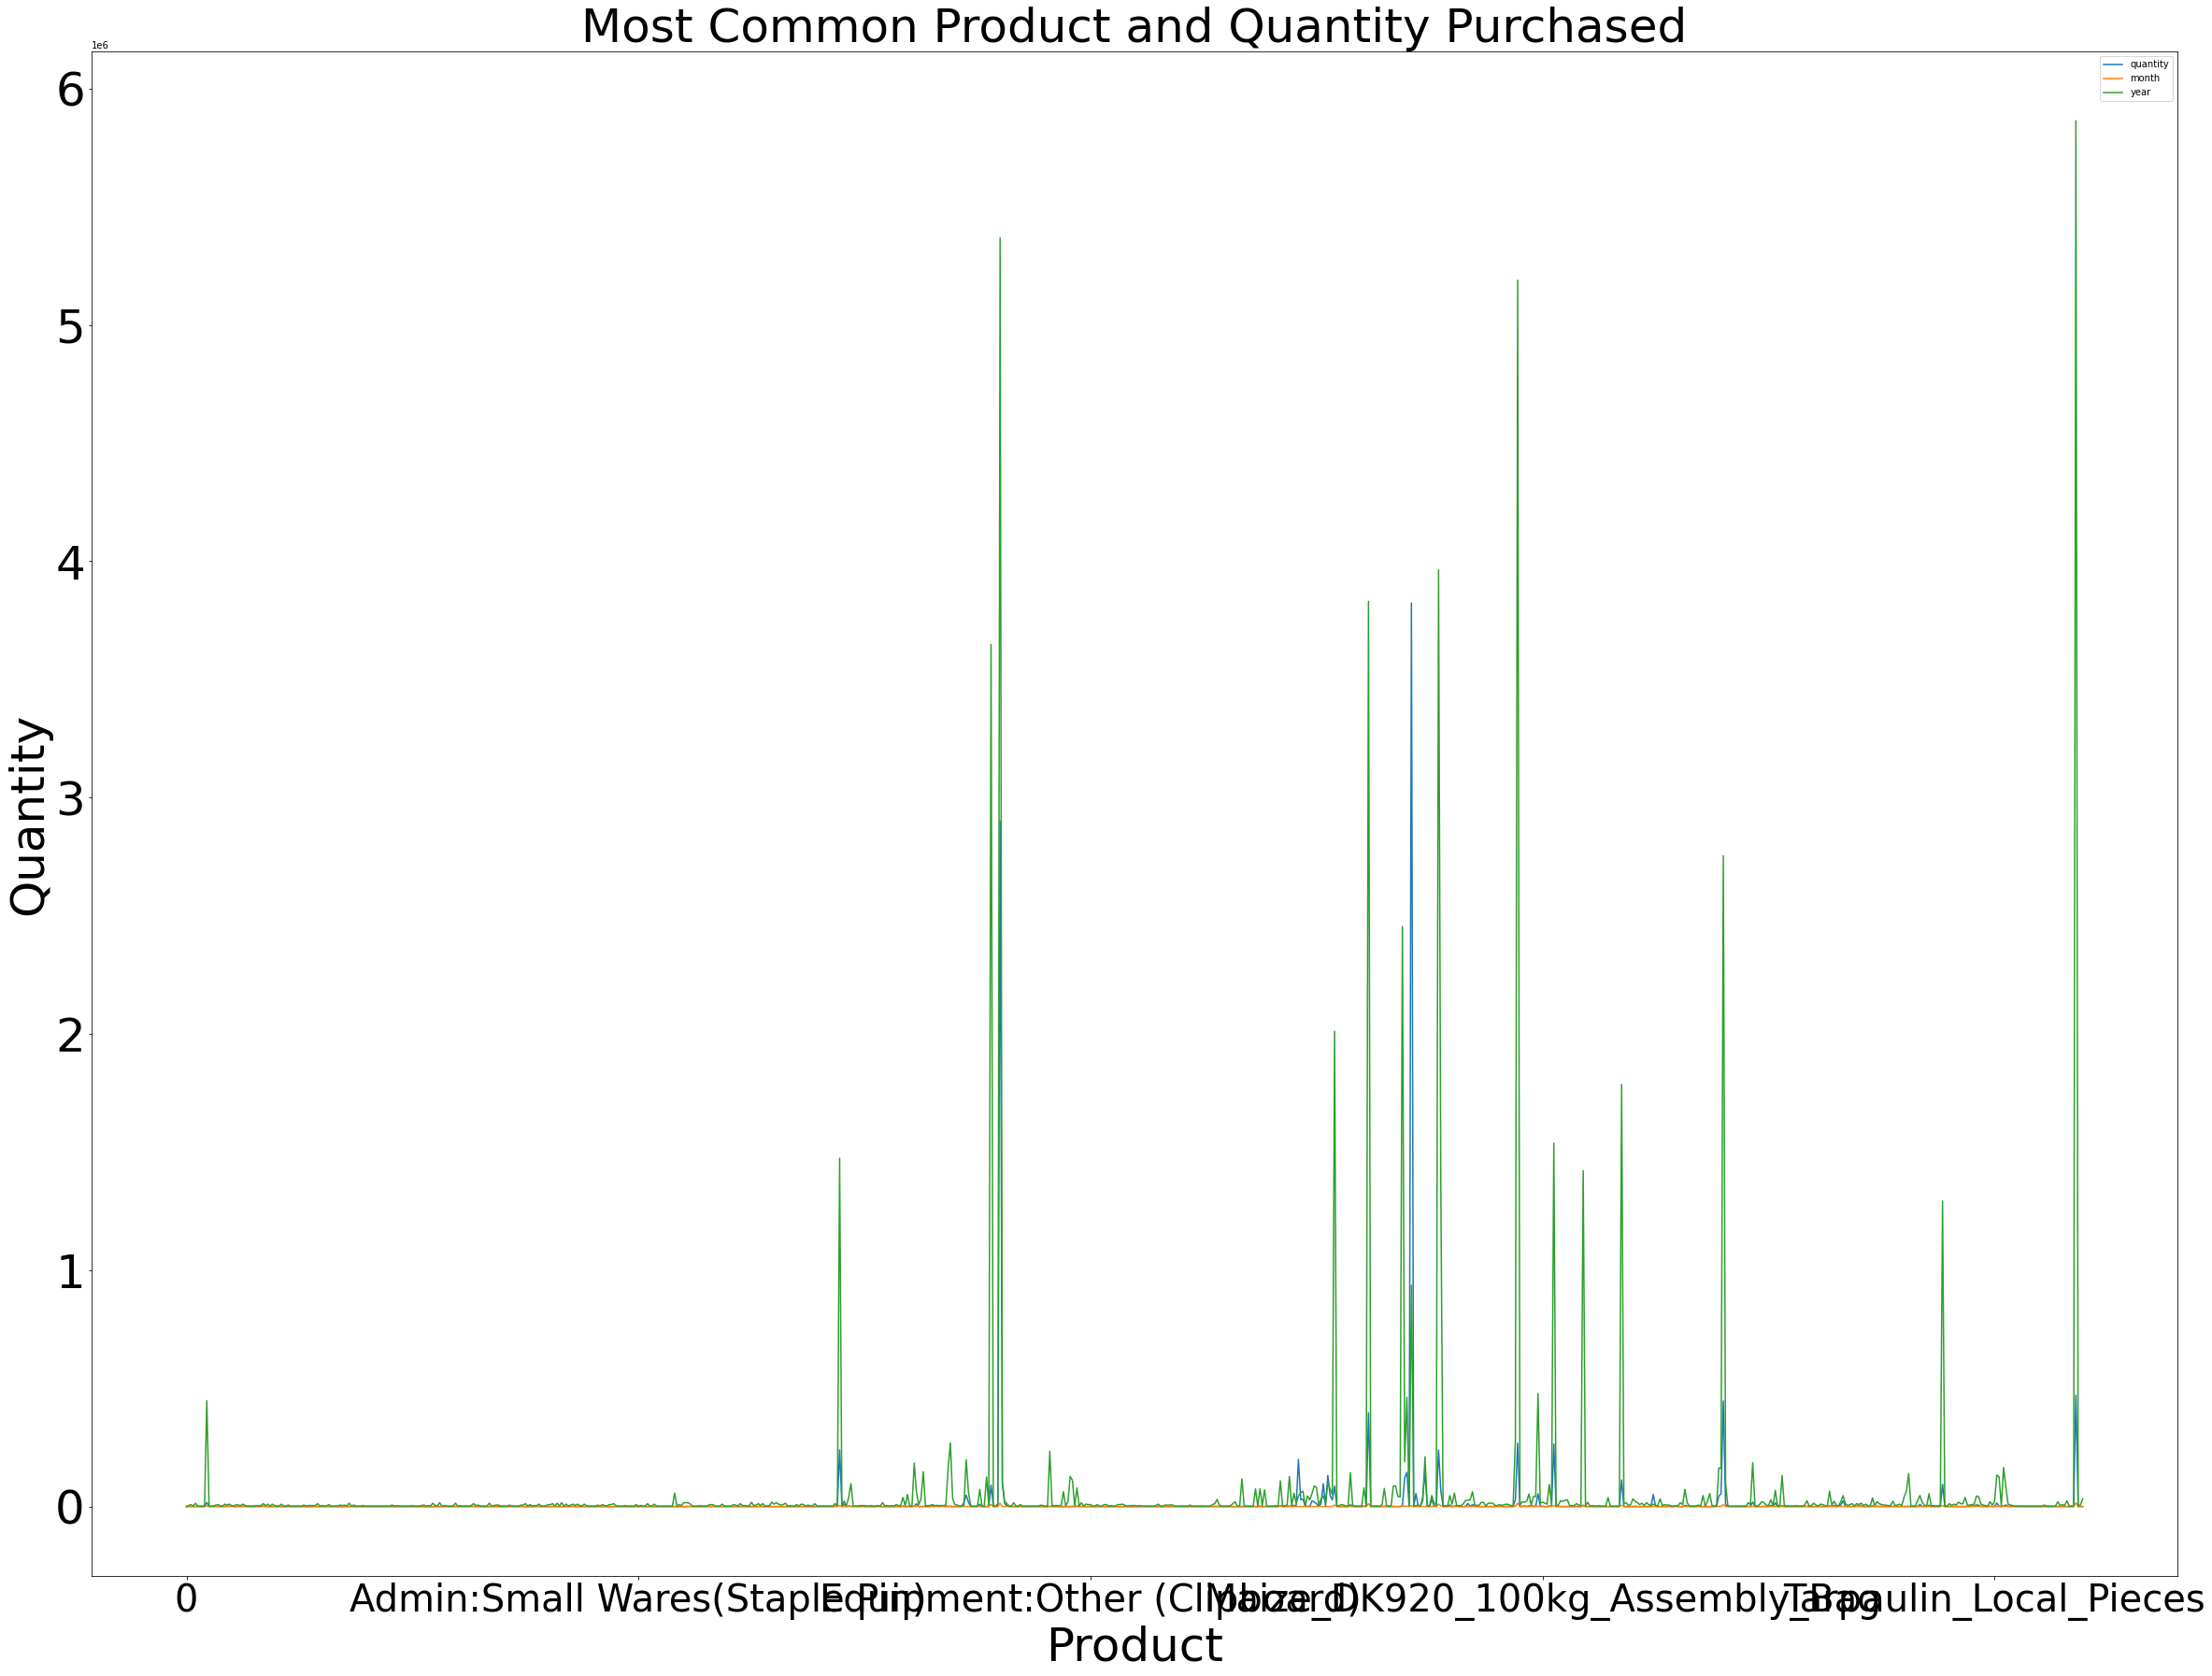

In [133]:
display = new_product.plot(figsize=(40, 30))
display.set_title("Most Common Product and Quantity Purchased", size=50)
display.set_ylabel('Quantity', size=50)
display.set_xlabel('Product', size=50)

for tick in display.xaxis.get_major_ticks():
    tick.label.set_fontsize(40) 
for tick in display.yaxis.get_major_ticks():
    tick.label.set_fontsize(50)

In [128]:
grp_year = product.groupby("year")["quantity"].sum()
grp_year

year
0            64
2018    3108392
2019    3400374
2020    5049813
Name: quantity, dtype: int32

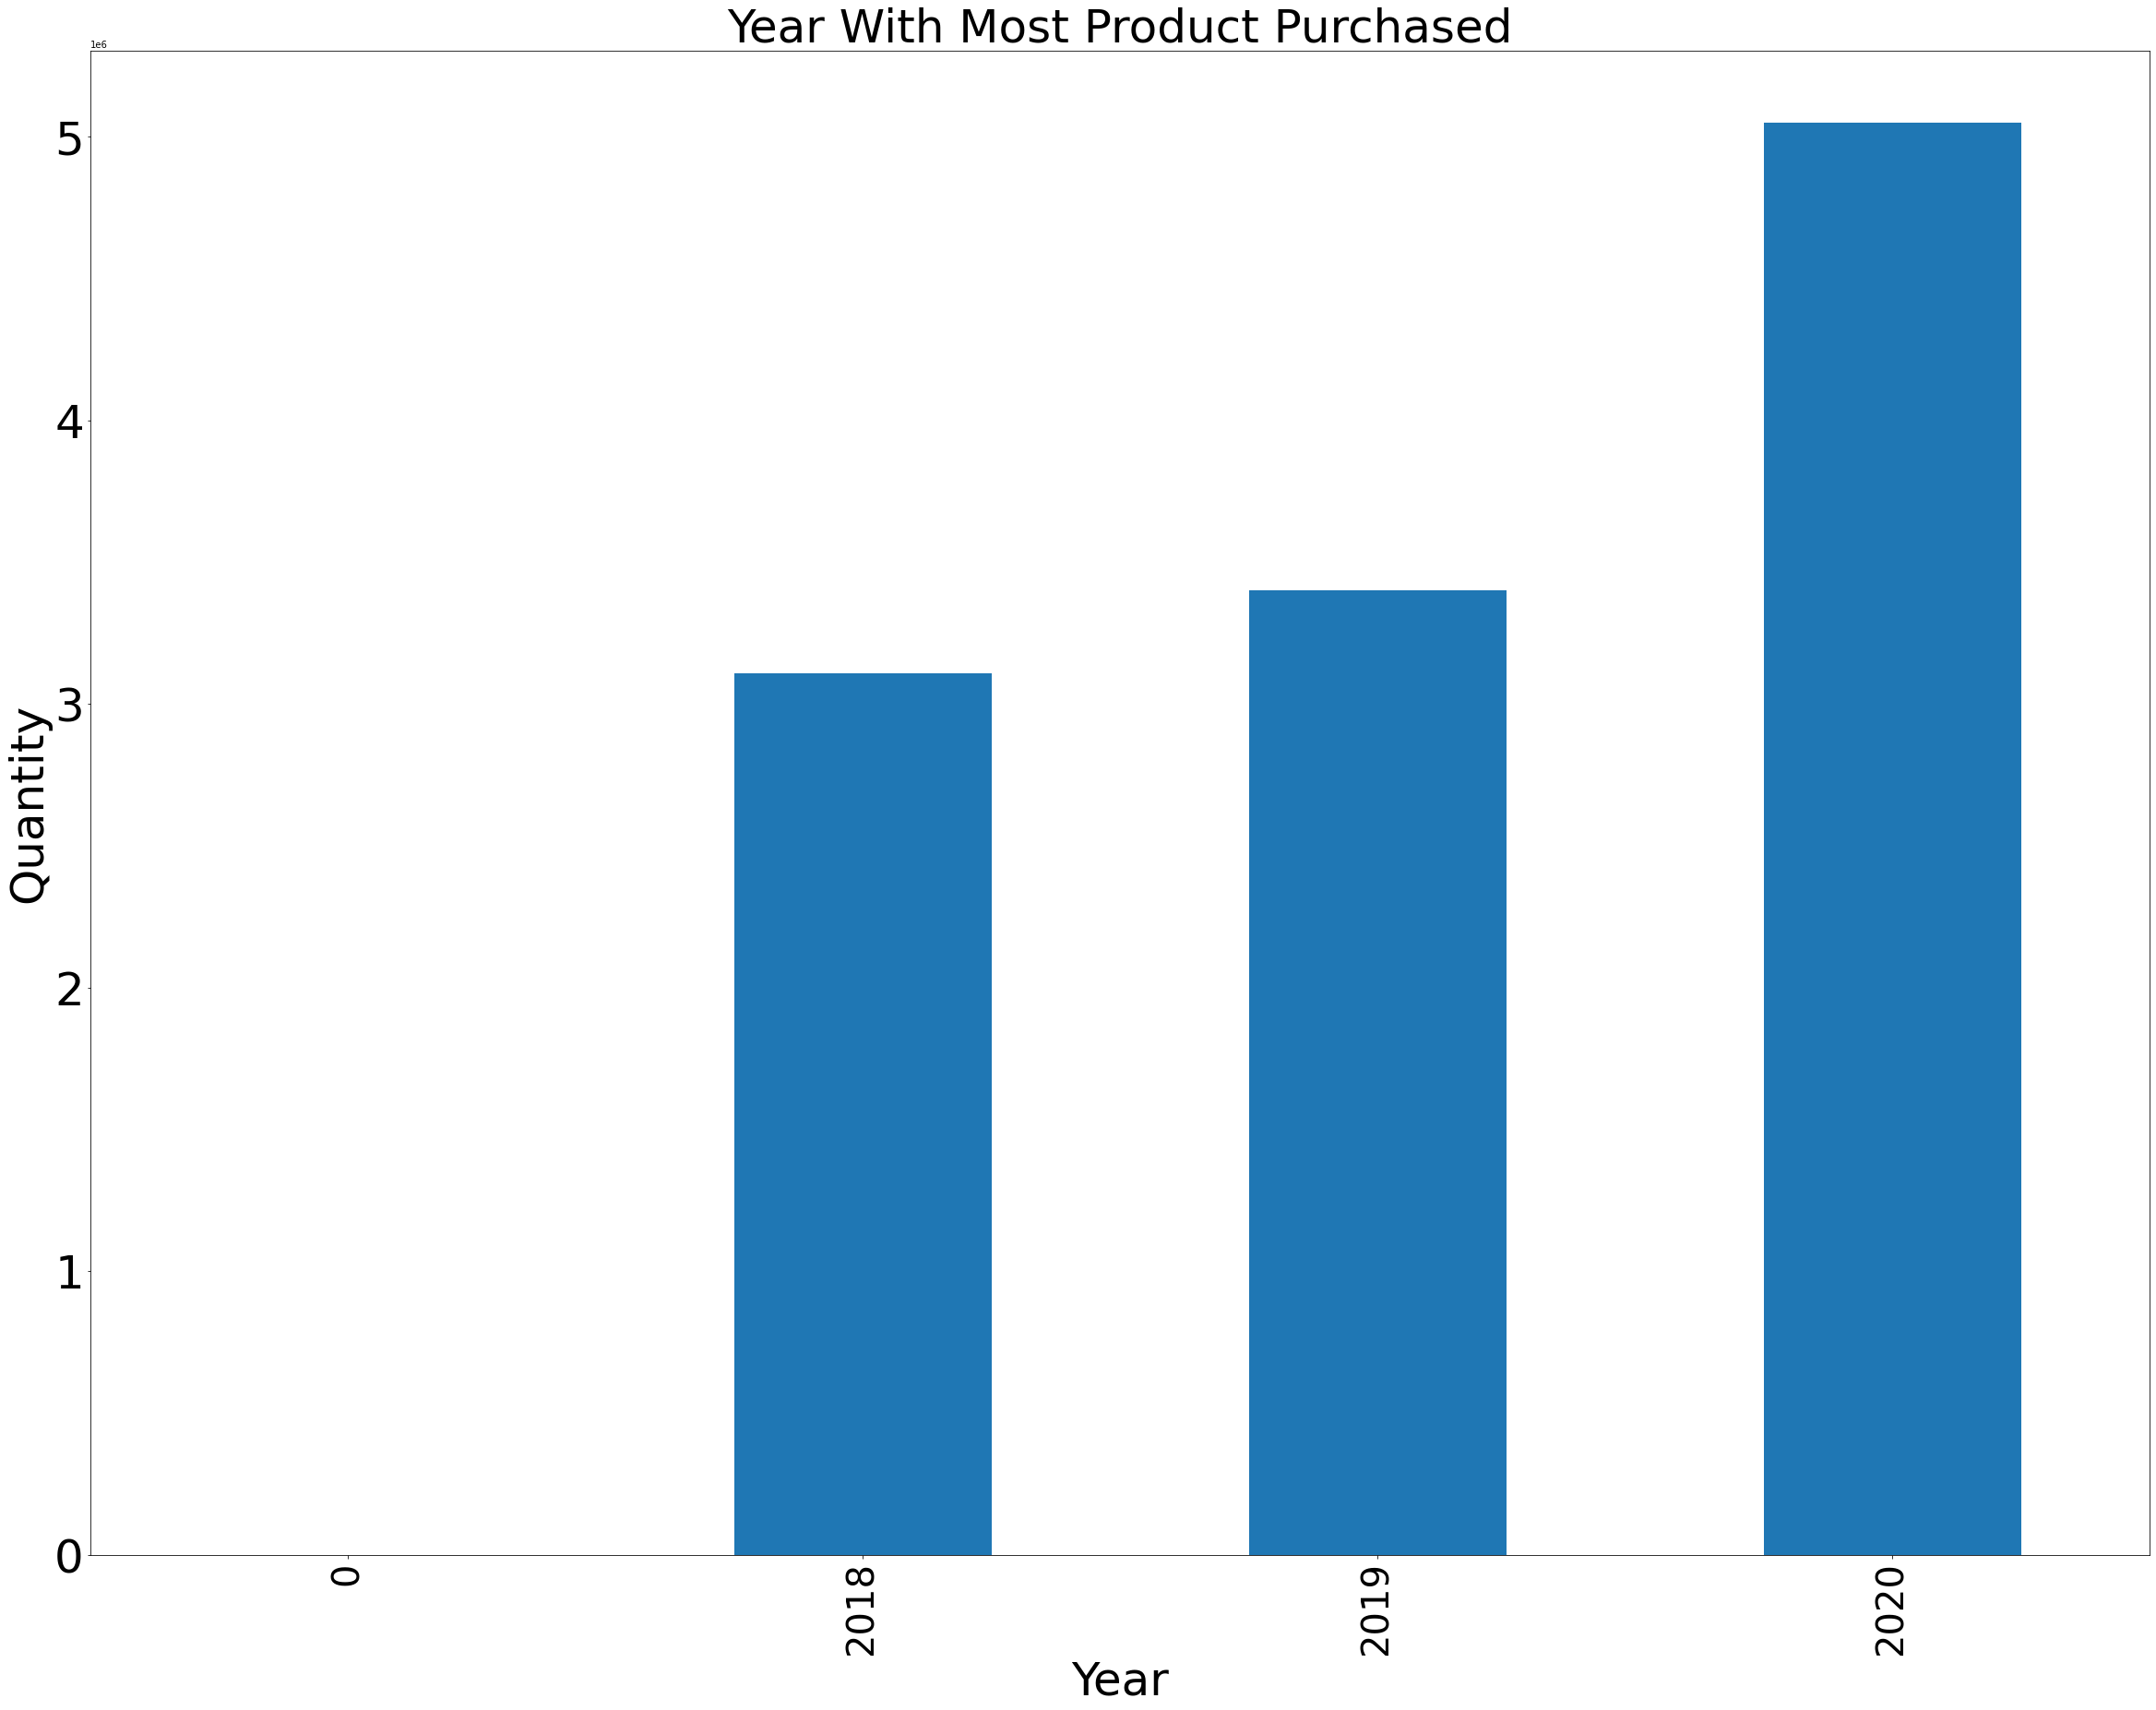

In [139]:
display = grp_year.plot(figsize=(40, 30), kind="bar")
display.set_title("Year With Most Product Purchased", size=50)
display.set_ylabel('Quantity', size=50)
display.set_xlabel('Year', size=50)

for tick in display.xaxis.get_major_ticks():
    tick.label.set_fontsize(40) 
for tick in display.yaxis.get_major_ticks():
    tick.label.set_fontsize(50) 

plt.show()

In [148]:
### Year 2020 has the most product purchases

In [138]:
grp_month = product.groupby("month")["quantity"].sum()
grp_month

month
0          64
1      543222
2      325233
3      284653
4     1392408
5     1886635
6     1183092
7      711567
8      414617
9      677752
10    1833069
11    1857349
12     448982
Name: quantity, dtype: int32

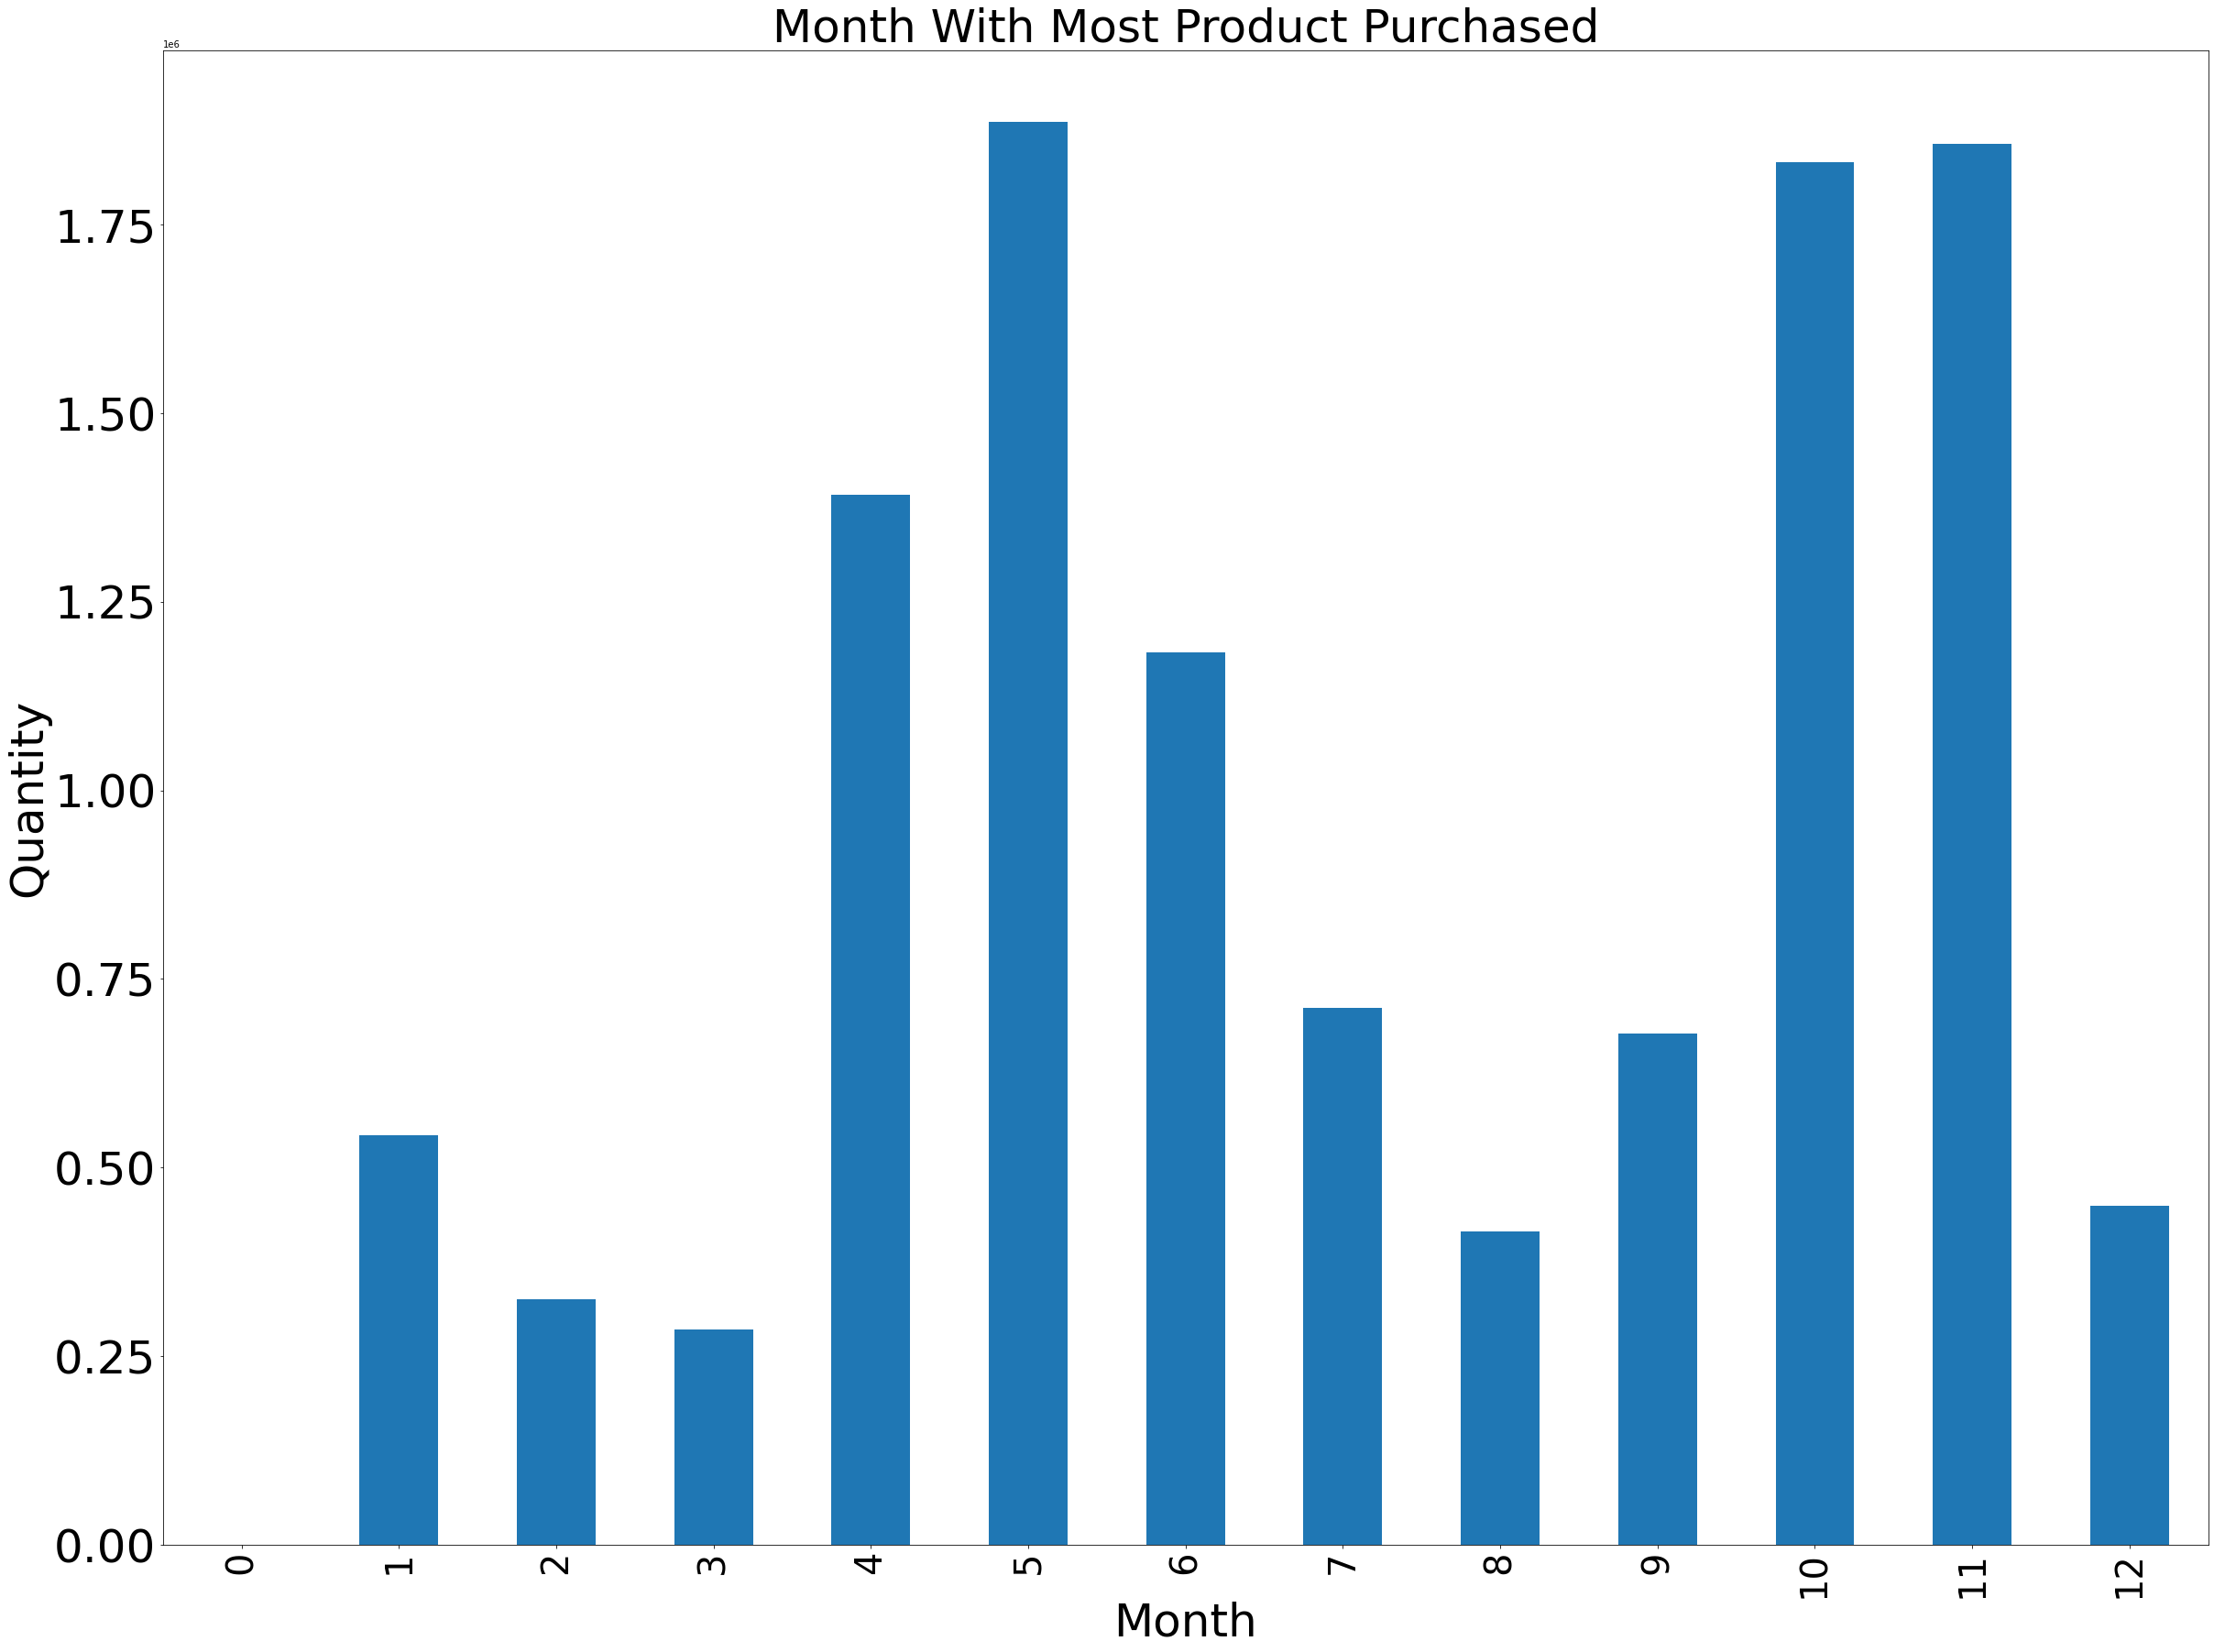

In [145]:
display = grp_month.plot(figsize=(40, 30), kind="bar")
display.set_title("Month With Most Product Purchased", size=50)
display.set_ylabel('Quantity', size=50)
display.set_xlabel('Month', size=50)

for tick in display.xaxis.get_major_ticks():
    tick.label.set_fontsize(40) 
for tick in display.yaxis.get_major_ticks():
    tick.label.set_fontsize(50) 

plt.show()


In [149]:
### Month 5 (May) has the most product purchases